In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('fast')

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

## Training data set

In [2]:
data = pd.read_csv(r'F:\Data Science and machine learning\Decision tree\loan_data\LoanPred_train.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

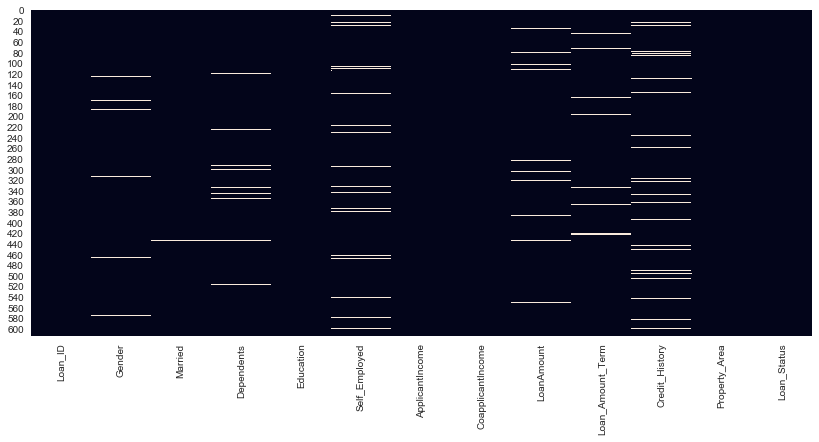

In [8]:
plt.figure(figsize=(14,6))
sns.heatmap(data.isnull(),cbar=False);

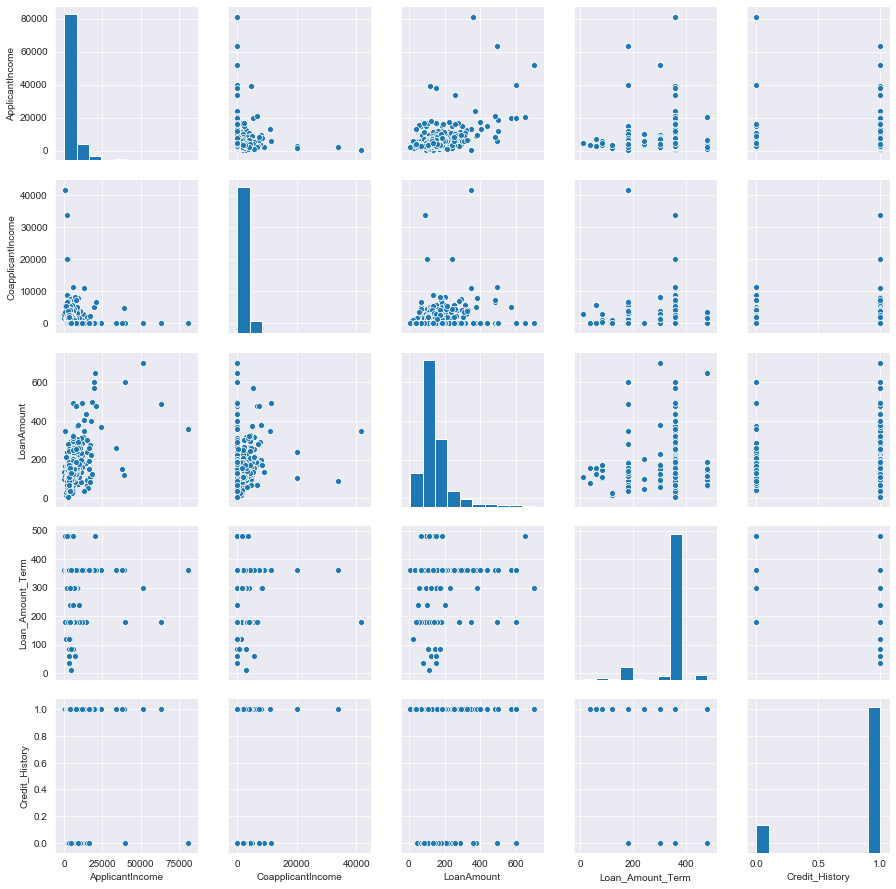

In [9]:
sns.pairplot(data)

In [9]:
data.LoanAmount.unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [10]:
data.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [11]:
data.Credit_History.unique()

array([ 1.,  0., nan])

In [12]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


<Figure size 1008x432 with 0 Axes>

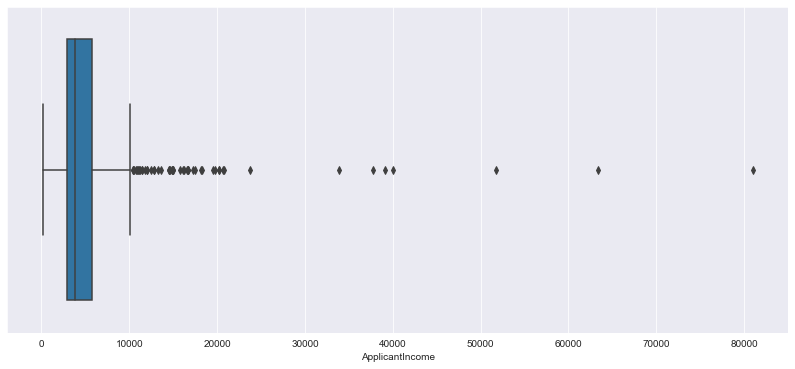

In [14]:
plt.figure(figsize=(14,6))
sns.boxplot(x='ApplicantIncome',data=data)

<Figure size 1008x432 with 0 Axes>

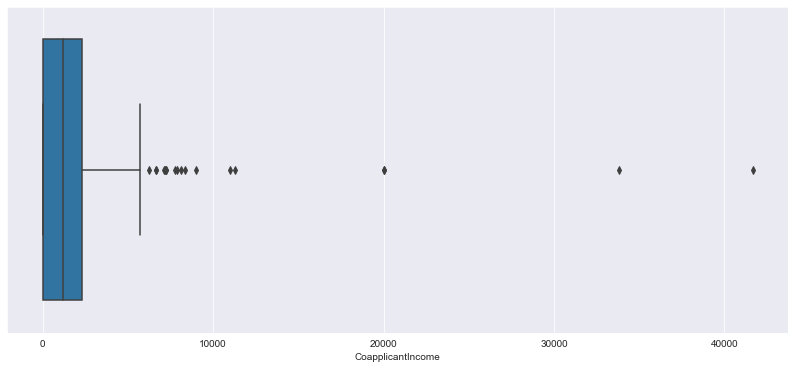

In [15]:
plt.figure(figsize=(14,6))
sns.boxplot(x='CoapplicantIncome',data=data)

<Figure size 1008x432 with 0 Axes>

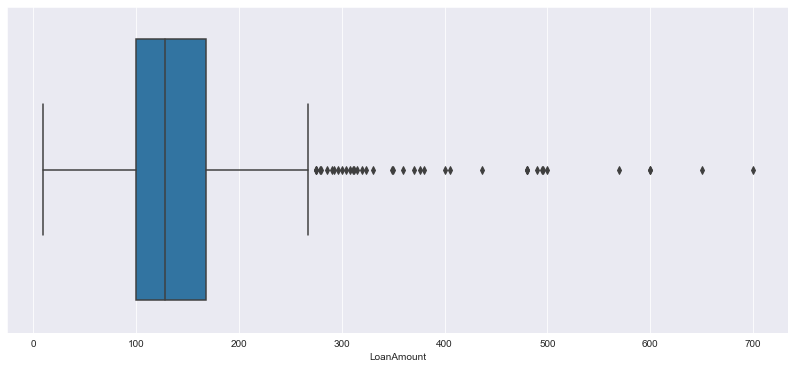

In [16]:
plt.figure(figsize=(14,6))
sns.boxplot(x='LoanAmount',data=data)

<Figure size 1008x432 with 0 Axes>

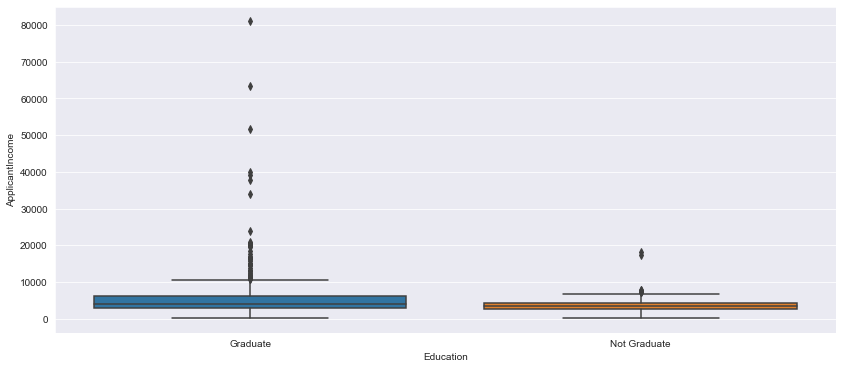

In [17]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Education',y='ApplicantIncome',data=data)

<Figure size 1008x432 with 0 Axes>

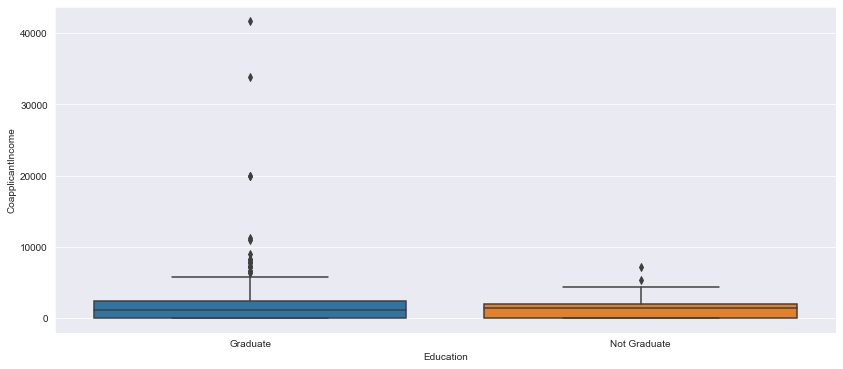

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Education',y='CoapplicantIncome',data=data)

<Figure size 1008x576 with 0 Axes>

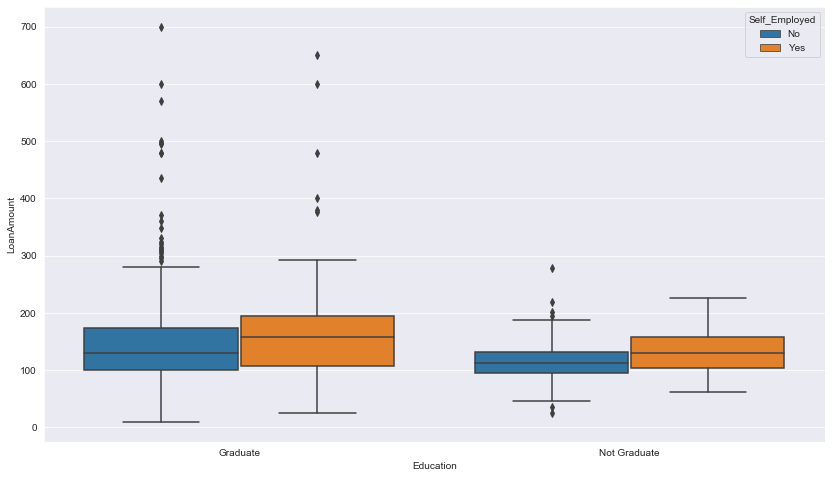

In [19]:
plt.figure(figsize=(14,8))
sns.boxplot(data['Education'],data['LoanAmount'],data['Self_Employed'],data=data)

<Figure size 1008x576 with 0 Axes>

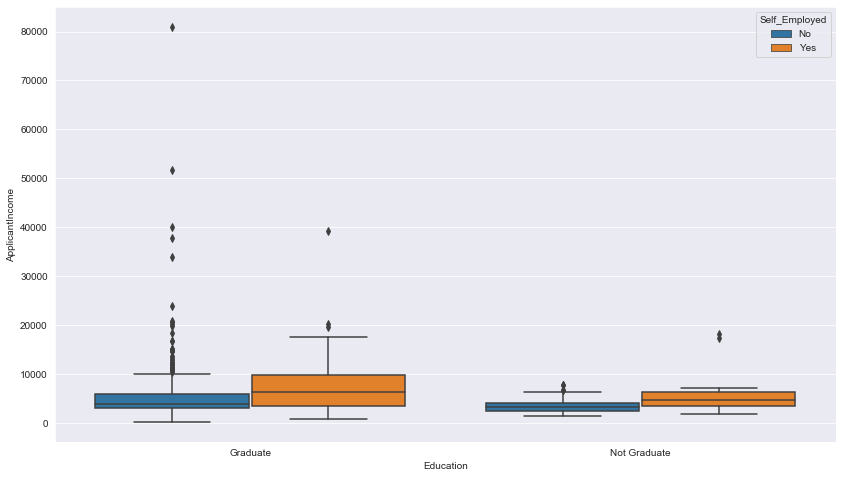

In [20]:
plt.figure(figsize=(14,8))
sns.boxplot(data['Education'],data['ApplicantIncome'],data['Self_Employed'],data=data)

In [13]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [14]:
stack_bar = pd.crosstab(data['Credit_History'],data['Loan_Status'])

In [15]:
stack_bar

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


<Figure size 1008x432 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

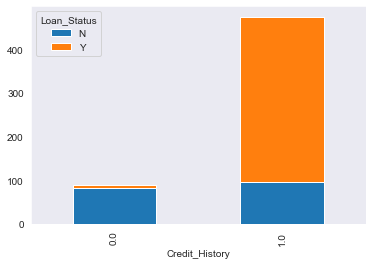

In [16]:
plt.figure(figsize=(14,6))
stack_bar.plot(kind='bar',stacked = True, grid=False)

In [16]:
stack_bar_Gender = pd.crosstab([data['Credit_History'],data['Gender']],data['Loan_Status'])

In [17]:
stack_bar_Gender

Loan_Status             N    Y
Credit_History Gender         
0.0            Female  16    1
               Male    63    6
1.0            Female  20   64
               Male    75  307

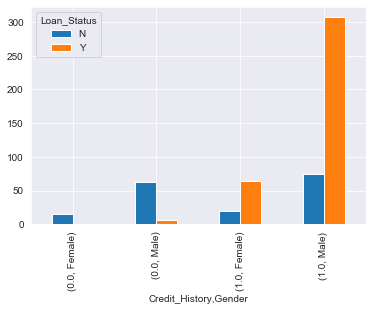

In [19]:
stack_bar_Gender.plot(kind='bar',stacked=False,grid=True)

In [18]:
# HANDLING MISSING VALUE

In [19]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [21]:
data.LoanAmount.isnull().sum()

0

In [22]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [23]:
data.Gender.isnull().sum()

0

In [24]:
data['Married'].fillna(data['Married'].mode()[0],inplace=True)

In [25]:
data.Married.isnull().sum()

0

In [26]:
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [27]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

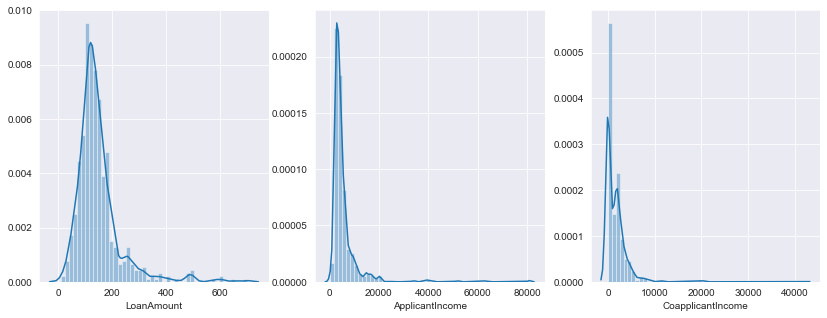

In [30]:
plt.figure(figsize=(14,5))
plt.subplot(131)
sns.distplot(data['LoanAmount'])
plt.subplot(132)
sns.distplot(data['ApplicantIncome'])
plt.subplot(133)
sns.distplot(data['CoapplicantIncome']);

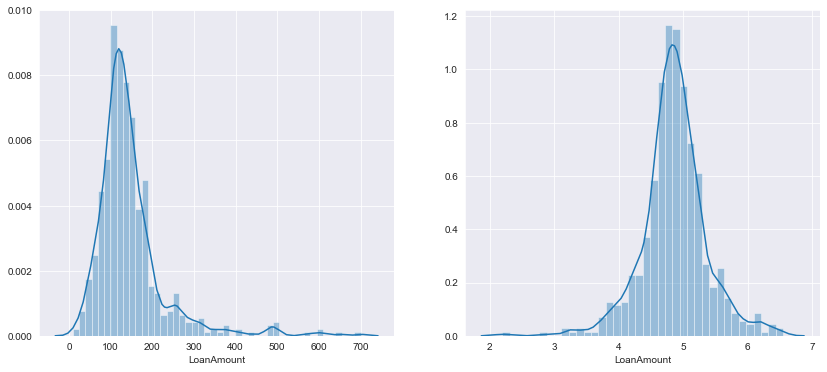

In [31]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.distplot(data['LoanAmount'])

plt.subplot(122)
sns.distplot(np.log(data['LoanAmount']));

In [28]:
data['Total_Applicant_Income'] = data['ApplicantIncome']+data['CoapplicantIncome']

In [29]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [30]:
data['log_LoanAmount'] = np.log(data['LoanAmount'])

In [31]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,log_LoanAmount
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,4.986426
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,4.852030


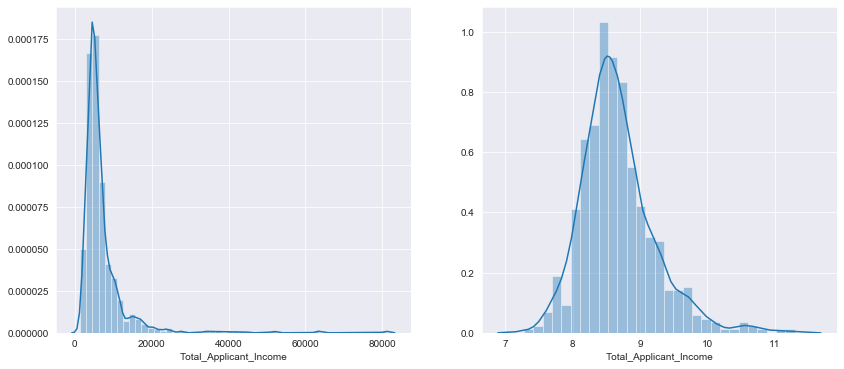

In [36]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.distplot(data['Total_Applicant_Income'])

plt.subplot(122)
sns.distplot(np.log(data['Total_Applicant_Income']));

In [32]:
data['log_Total_Applicant_Income']= np.log(data['Total_Applicant_Income'])

In [33]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,log_LoanAmount,log_Total_Applicant_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,4.986426,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,4.189655,8.006368


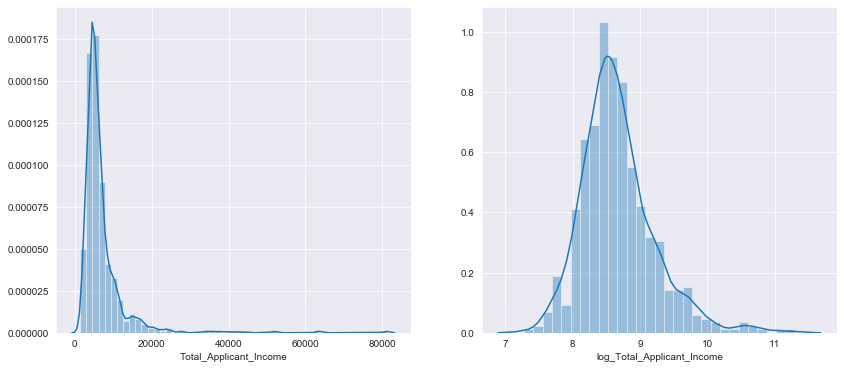

In [39]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.distplot(data['Total_Applicant_Income'])

plt.subplot(122)
sns.distplot(data['log_Total_Applicant_Income']);

In [64]:
!pip install graphviz

In [62]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp37-none-any.whl size=24573 sha256=6bd0364ba82093c816a419c35e6adc75c4f6847ab53a33202d04a29a45da4f61
  Stored in directory: C:\Users\WIN-7\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [34]:
data.dtypes

Loan_ID                        object
Gender                         object
Married                        object
Dependents                     object
Education                      object
Self_Employed                  object
ApplicantIncome                 int64
CoapplicantIncome             float64
LoanAmount                    float64
Loan_Amount_Term              float64
Credit_History                float64
Property_Area                  object
Loan_Status                    object
Total_Applicant_Income        float64
log_LoanAmount                float64
log_Total_Applicant_Income    float64
dtype: object

In [35]:
data.Credit_History.unique()

array([1., 0.])

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
cat_cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

le = LabelEncoder()

for i in cat_cols:
    data[i] = le.fit_transform(data[i])
    
data.dtypes

Loan_ID                        object
Gender                          int32
Married                         int32
Dependents                      int32
Education                       int32
Self_Employed                   int32
ApplicantIncome                 int64
CoapplicantIncome             float64
LoanAmount                    float64
Loan_Amount_Term              float64
Credit_History                float64
Property_Area                   int32
Loan_Status                     int32
Total_Applicant_Income        float64
log_LoanAmount                float64
log_Total_Applicant_Income    float64
dtype: object

In [38]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Applicant_Income', 'log_LoanAmount',
       'log_Total_Applicant_Income'],
      dtype='object')

In [39]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,log_LoanAmount,log_Total_Applicant_Income
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0,4.986426,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0,4.852030,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0,4.189655,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0,4.787492,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0,4.948760,8.699515


In [40]:
## Building the model

In [41]:
X = data[['Credit_History','Loan_Amount_Term','log_LoanAmount']]
Y = data['Loan_Status']

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
model1 = DecisionTreeClassifier().fit(X,Y)

In [44]:
from sklearn.metrics import classification_report,auc,accuracy_score,f1_score,precision_score,confusion_matrix,roc_auc_score,roc_curve

In [45]:
print(accuracy_score(Y,model1.predict(X)))

0.8941368078175895


In [46]:
data.isnull().sum()

Loan_ID                       0
Gender                        0
Married                       0
Dependents                    0
Education                     0
Self_Employed                 0
ApplicantIncome               0
CoapplicantIncome             0
LoanAmount                    0
Loan_Amount_Term              0
Credit_History                0
Property_Area                 0
Loan_Status                   0
Total_Applicant_Income        0
log_LoanAmount                0
log_Total_Applicant_Income    0
dtype: int64

In [47]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [48]:
import os
os.getcwd()

'C:\\Users\\WIN-7\\python_course\\Machine_Learning'

In [ ]:
dot_data = export_graphviz(model1,out_file=None,feature_names=['Credit_History','Loan_Amount_Term','log_LoanAmount'])

#Draw graph

graph = pydotplus.graph_from_dot_data(dot_data)

#show graph

Image(graph.create_png())

In [ ]:
dot_data = export_graphviz(model1, out_file=None, feature_names =['Credit_History','Loan_Amount_Term','log_LoanAmount'] , filled=True, rounded=True)

#Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

edges = collections.defaultdict(list)

for edge in edges:
    edges[edge].sort()
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
Image(graph.create_png())
graph.write_png('tree.png')